In [2]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
import torch
from data import *

In [3]:
def find_indices(A, B):
    return np.where(np.in1d(A, B))[0]

In [3]:
def plotter_for_generic_dist(qgan_file, qcbm_file, ddqcl_file, aclbm_file, data):
    with open(qgan_file + ".pkl", "rb") as qgan_loss, open(qgan_file + ".pt", "rb") as qgan_hist,\
        open(qcbm_file + ".pkl", "rb") as qcbm_loss, open(qcbm_file + ".pt", "rb") as qcbm_hist, \
        open(ddqcl_file + ".pkl", "rb") as ddqcl_loss, open(ddqcl_file + ".pt", "rb") as ddqcl_hist, \
        open(aclbm_file + ".pkl", "rb") as aclbm_loss, open(aclbm_file + ".pt", "rb") as aclbm_hist:
        

        qgan_loss_history, qgan_js_div, qgan_kl_div = pickle.load(qgan_loss)
        qcbm_loss_history, qcbm_js_div, qcbm_kl_div = pickle.load(qcbm_loss)
        ddqcl_loss_history, ddqcl_js_div, ddqcl_kl_div = pickle.load(ddqcl_loss)
        aclbm_loss_history, aclbm_js_div, aclbm_kl_div = pickle.load(aclbm_loss)


        qgan_pmf = torch.load(qgan_hist).numpy()
        qcbm_pmf = torch.load(qcbm_hist).numpy()
        ddqcl_pmf = torch.load(ddqcl_hist).numpy()
        aclbm_pmf = torch.load(aclbm_hist).numpy()
    
    aclbm_kl_indices = find_indices(aclbm_kl_div["iteration"], aclbm_kl_div["epoch"])
    real_pmf = DATA_HUB[data].get_data(num=100000000)

    fig = plt.figure(figsize=(30, 3))
    gs = gridspec.GridSpec(1, 5, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    ax4 = fig.add_subplot(gs[0, 3])
    ax5 = fig.add_subplot(gs[0, 4])
        
    ax1.plot(np.arange(len(qgan_kl_div)) + 1,               qgan_kl_div,               ls=":", color="darkviolet", label="QGAN", markerfacecolor="none")
    ax1.plot(np.arange(len(qcbm_kl_div)) + 1,               qcbm_kl_div,               ls=":", color="blue",       label="QCBM", markerfacecolor="none")
    ax1.plot(np.arange(len(ddqcl_kl_div)) + 1,              ddqcl_kl_div,              ls=":", color="olivedrab",  label="DDQCL")
    ax1.plot(np.arange(len(aclbm_kl_div["iteration"])) + 1, aclbm_kl_div["iteration"], ls=":", color="red",        label="ACLBM")
    ax1.plot(aclbm_kl_indices + 1,                          aclbm_kl_div["epoch"],     ls="",  color="red",        marker="x",   markersize=5)
    ax1.set_ylim(bottom=0.0)
    ax1.set_title(f"KL divergence of dataset {data}")
    ax1.set_xlabel("iteration")
    ax1.set_ylabel("KL divergence")
    ax1.grid(ls="--", alpha=0.7)
    ax1.legend()

    ax2.plot(np.arange(len(qgan_pmf)) + 1,  real_pmf,  color="black",      alpha=0.5, ls="--", lw=2)
    ax2.bar(np.arange(len(qgan_pmf)) + 1,   qgan_pmf,  color="darkviolet", alpha=0.5)
    ax2.set_title(f"{data} PMF for QGAN")

    ax3.plot(np.arange(len(qcbm_pmf)) + 1,  real_pmf,  color="black",      alpha=0.5, ls="--", lw=2)
    ax3.bar(np.arange(len(qcbm_pmf)) + 1,   qcbm_pmf,  color="blue",       alpha=0.5)
    ax3.set_title(f"{data} PMF for QCBM")
    ax3.set_yticks([])

    ax4.plot(np.arange(len(ddqcl_pmf)) + 1, real_pmf,  color="black",      alpha=0.5, ls="--", lw=2)
    ax4.bar(np.arange(len(ddqcl_pmf)) + 1,  ddqcl_pmf, color="olivedrab",  alpha=0.5)
    ax4.set_title(f"{data} PMF for DDQCL")
    ax4.set_yticks([])

    ax5.plot(np.arange(len(aclbm_pmf)) + 1, real_pmf,  color="black",      alpha=0.5, ls="--", lw=2)
    ax5.bar(np.arange(len(aclbm_pmf)) + 1,  aclbm_pmf, color="red",        alpha=0.5)
    ax5.set_title(f"{data} PMF for ACLBM")
    ax5.set_yticks([])

    ax2.set_ylim(top=0.004)
    ax3.set_ylim(top=0.004)
    ax4.set_ylim(top=0.004)
    ax5.set_ylim(top=0.004)

    plt.show()

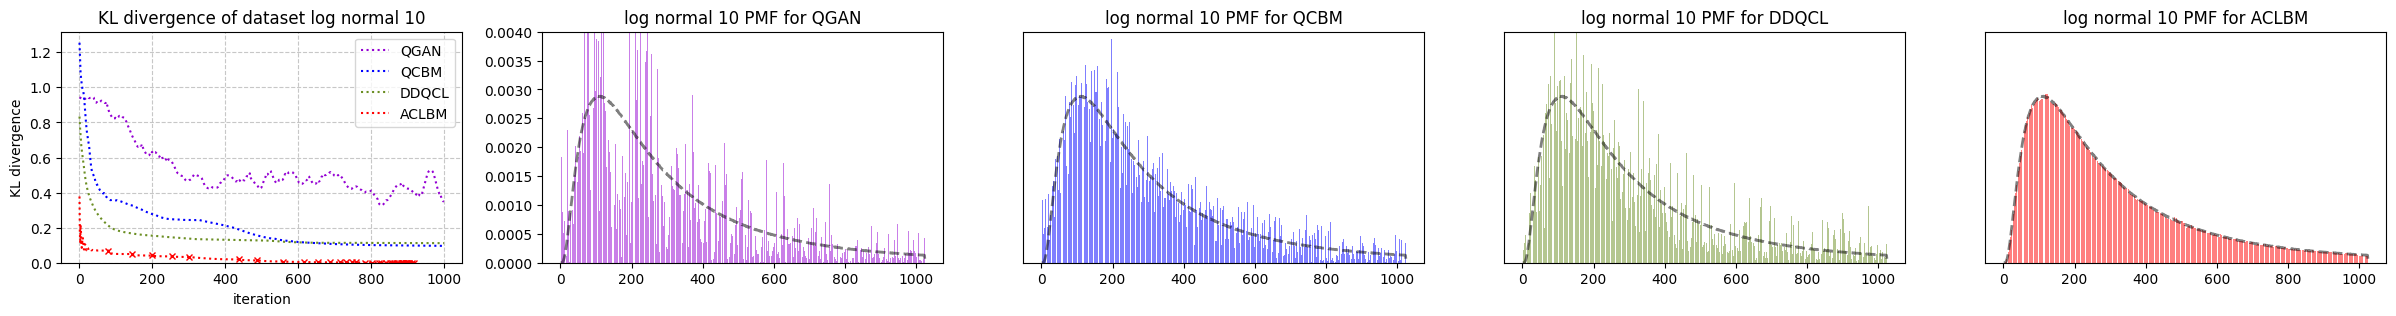

In [4]:
plotter_for_generic_dist(
    qgan_file="./results/QGAN(data=log normal 10, lr=0.001, reps=10)",
    qcbm_file="./results/QCBM(data=log normal 10, lr=0.01, reps=10)",
    ddqcl_file="./results/DDQCL(data=log normal 10, lr=0.01, reps=10)",
    aclbm_file="./results/ACLBM(data=log normal 10, loss=KL divergence, Ng=3, t1=0.001, t2=0.005)",
    data="log normal 10",
)

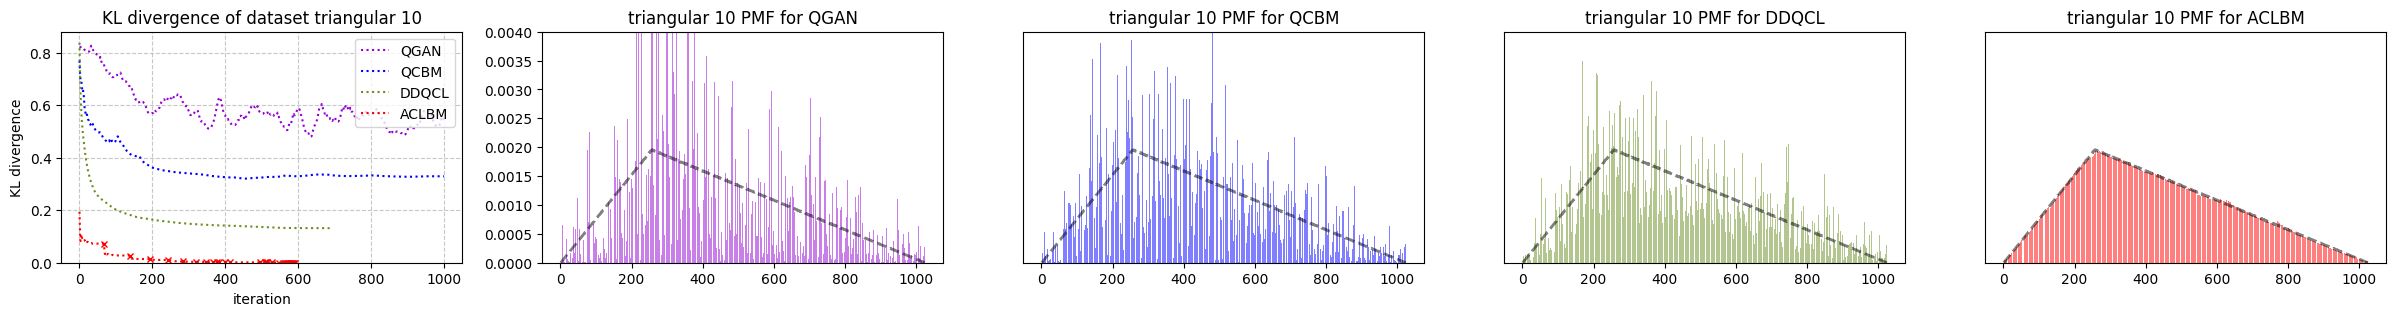

In [5]:
plotter_for_generic_dist(
    qgan_file="./results/QGAN(data=triangular 10, lr=0.001, reps=10)",
    qcbm_file="./results/QCBM(data=triangular 10, lr=0.01, reps=10)",
    ddqcl_file="./results/DDQCL(data=triangular 10, lr=0.01, reps=10)",
    aclbm_file="./results/ACLBM(data=triangular 10, loss=KL divergence, Ng=3, t1=0.001, t2=0.005)",
    data="triangular 10",
)

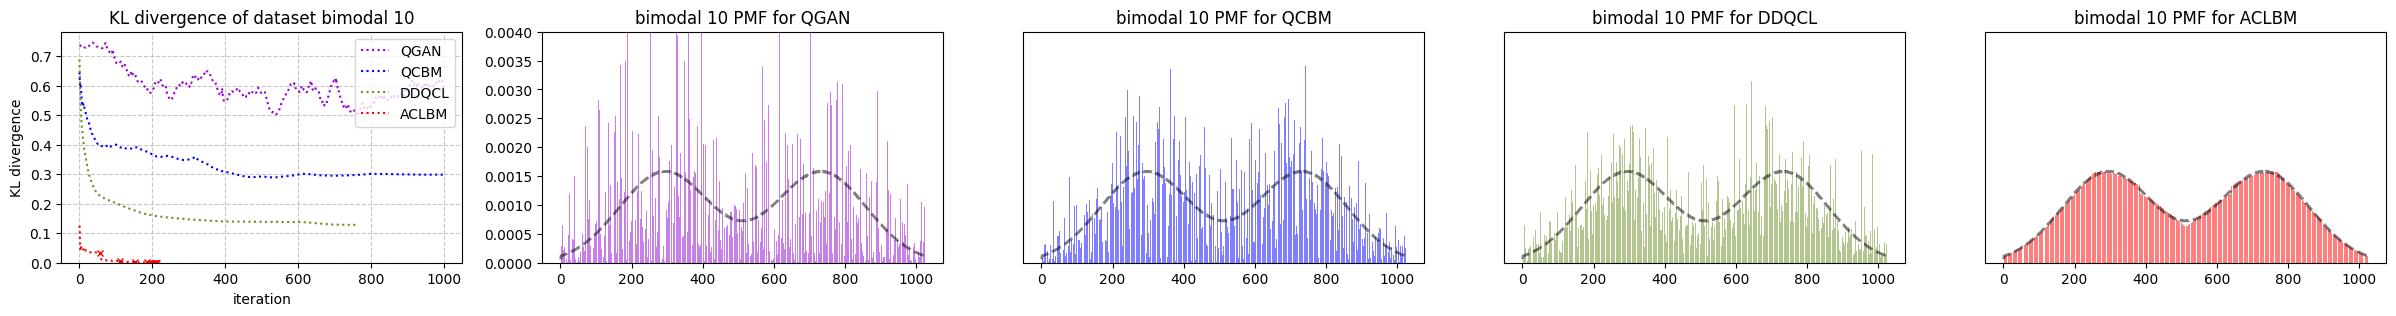

In [6]:
plotter_for_generic_dist(
    qgan_file="./results/QGAN(data=bimodal 10, lr=0.001, reps=10)",
    qcbm_file="./results/QCBM(data=bimodal 10, lr=0.01, reps=10)",
    ddqcl_file="./results/DDQCL(data=bimodal 10, lr=0.01, reps=10)",
    aclbm_file="./results/ACLBM(data=bimodal 10, loss=KL divergence, Ng=3, t1=0.001, t2=0.005)",
    data="bimodal 10",
)

In [20]:
def plotter_for_bas(qgan_file, qcbm_file, ddqcl_file, aclbm_file, data):
    with open(qgan_file + ".pkl", "rb") as qgan_loss, open(qgan_file + ".pt", "rb") as qgan_hist, \
        open(qcbm_file + ".pkl", "rb") as qcbm_loss, open(qcbm_file + ".pt", "rb") as qcbm_hist, \
        open(ddqcl_file + ".pkl", "rb") as ddqcl_loss, open(ddqcl_file + ".pt", "rb") as ddqcl_hist, \
        open(aclbm_file + ".pkl", "rb") as aclbm_loss, open(aclbm_file + ".pt", "rb") as aclbm_hist:
            
        qgan_loss_history, qgan_js_div, qgan_kl_div = pickle.load(qgan_loss)
        qcbm_loss_history, qcbm_js_div, qcbm_kl_div = pickle.load(qcbm_loss)
        ddqcl_loss_history, ddqcl_js_div, ddqcl_kl_div = pickle.load(ddqcl_loss)
        aclbm_loss_history, aclbm_js_div, aclbm_kl_div = pickle.load(aclbm_loss)

        real_pmf = DATA_HUB[data].get_data(num=100000000)
        qgan_pmf = torch.load(qgan_hist).numpy()
        qcbm_pmf = torch.load(qcbm_hist).numpy()
        ddqcl_pmf = torch.load(ddqcl_hist).numpy()
        aclbm_pmf = torch.load(aclbm_hist).numpy()

    aclbm_kl_indices = find_indices(aclbm_kl_div["iteration"], aclbm_kl_div["epoch"])

    fig = plt.figure(figsize=(30, 3))
    gs = gridspec.GridSpec(1, 5, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    ax4 = fig.add_subplot(gs[0, 3])
    ax5 = fig.add_subplot(gs[0, 4])
    
    ax1.plot(np.arange(len(qgan_kl_div)) + 1,               qgan_kl_div,               ls=":", color="darkviolet", label="QGAN", markerfacecolor="none")
    ax1.plot(np.arange(len(qcbm_kl_div)) + 1,               qcbm_kl_div,               ls=":", color="blue",       label="QCBM", markerfacecolor="none")
    ax1.plot(np.arange(len(ddqcl_kl_div)) + 1,              ddqcl_kl_div,              ls=":", color="olivedrab",  label="DDQCL")
    ax1.plot(np.arange(len(aclbm_kl_div["iteration"])) + 1, aclbm_kl_div["iteration"], ls=":", color="red",        label="ACLBM")
    ax1.plot(aclbm_kl_indices + 1,                          aclbm_kl_div["epoch"],     ls="",  color="red",        marker="x",   markersize=5)
    ax1.set_ylim(bottom=0.0)
    ax1.set_title(f"KL divergence of dataset {data}")
    ax1.set_xlabel("iteration")
    ax1.set_ylabel("KL divergence")
    ax1.grid(ls="--", alpha=0.7)
    ax1.legend()
    
    width = 0.8
    if data == 'bas 4x4':
        width = 200.0

    ax2.bar(np.arange(len(qgan_pmf)) + 1,  real_pmf,  color="saddlebrown", alpha=0.8, width=width)
    ax2.bar(np.arange(len(qgan_pmf)) + 1,  qgan_pmf,  color="darkviolet",  alpha=0.5, width=width)
    ax2.set_title(f"{data} PMF for QGAN")

    ax3.bar(np.arange(len(qcbm_pmf)) + 1,  real_pmf,  color="saddlebrown", alpha=0.8, width=width)
    ax3.bar(np.arange(len(qcbm_pmf)) + 1,  qcbm_pmf,  color="blue",        alpha=0.5, width=width)
    ax3.set_title(f"{data} PMF for QCBM")
    ax3.set_yticks([])

    ax4.bar(np.arange(len(ddqcl_pmf)) + 1, real_pmf,  color="saddlebrown", alpha=0.8, width=width)
    ax4.bar(np.arange(len(ddqcl_pmf)) + 1, ddqcl_pmf, color="olivedrab",   alpha=0.5, width=width)
    ax4.set_title(f"{data} PMF for DDQCL")
    ax4.set_yticks([])

    ax5.bar(np.arange(len(aclbm_pmf)) + 1, real_pmf,  color="saddlebrown", alpha=0.8, width=width)
    ax5.bar(np.arange(len(aclbm_pmf)) + 1, aclbm_pmf, color="red",         alpha=0.5, width=width)
    ax5.set_title(f"{data} PMF for ACLBM")
    ax5.set_yticks([])
    
    if data == 'bas 2x2':
        top = 0.18
    elif data == 'bas 3x3':
        top = 0.08
    elif data == 'bas 4x4':
        top = 0.04

    ax2.set_ylim(top=top)
    ax3.set_ylim(top=top)
    ax4.set_ylim(top=top)
    ax5.set_ylim(top=top)

    plt.show()

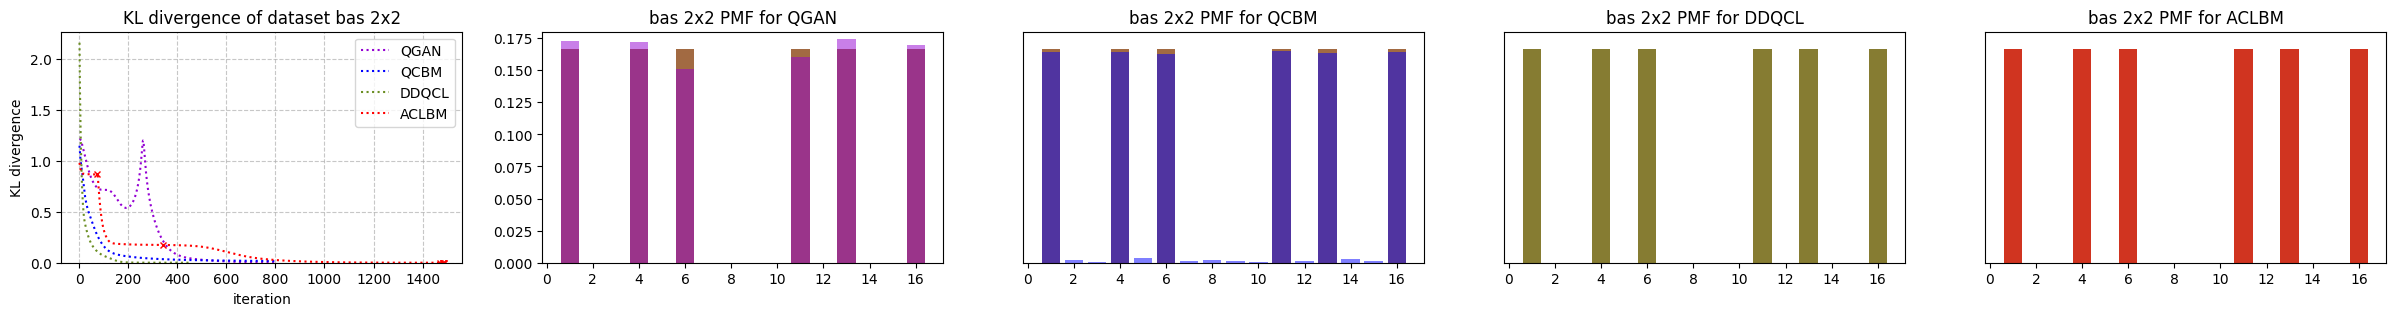

In [18]:
plotter_for_bas(
    qgan_file="./results/QGAN(data=bas 2x2, lr=0.001, reps=4)",
    qcbm_file="./results/QCBM(data=bas 2x2, lr=0.01, reps=4)",
    ddqcl_file="./results/DDQCL(data=bas 2x2, lr=0.01, reps=4)",
    aclbm_file="./results/ACLBM(data=bas 2x2, loss=KL divergence, Ng=3, t1=0.001, t2=0.005)",
    data="bas 2x2",
)

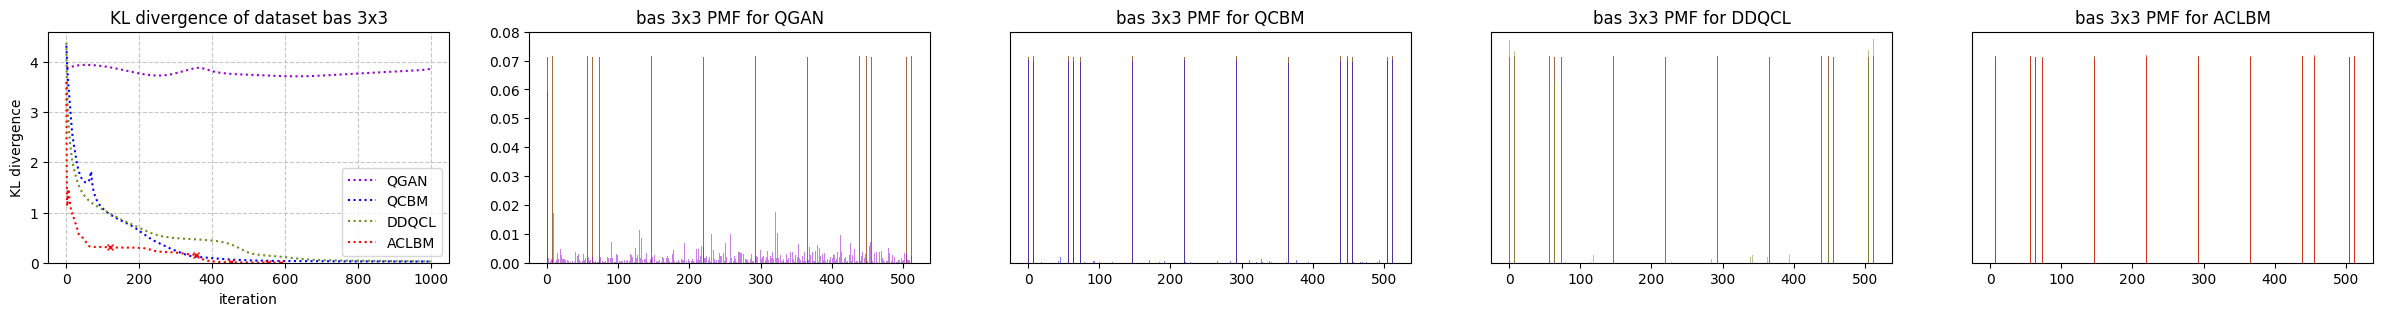

In [21]:
plotter_for_bas(
    qgan_file="./results/QGAN(data=bas 3x3, lr=0.001, reps=10)",
    qcbm_file="./results/QCBM(data=bas 3x3, lr=0.01, reps=10)",
    ddqcl_file="./results/DDQCL(data=bas 3x3, lr=0.01, reps=10)",
    aclbm_file="./results/ACLBM(data=bas 3x3, loss=KL divergence, Ng=45, t1=0.001, t2=0.005)",
    data="bas 3x3"
)

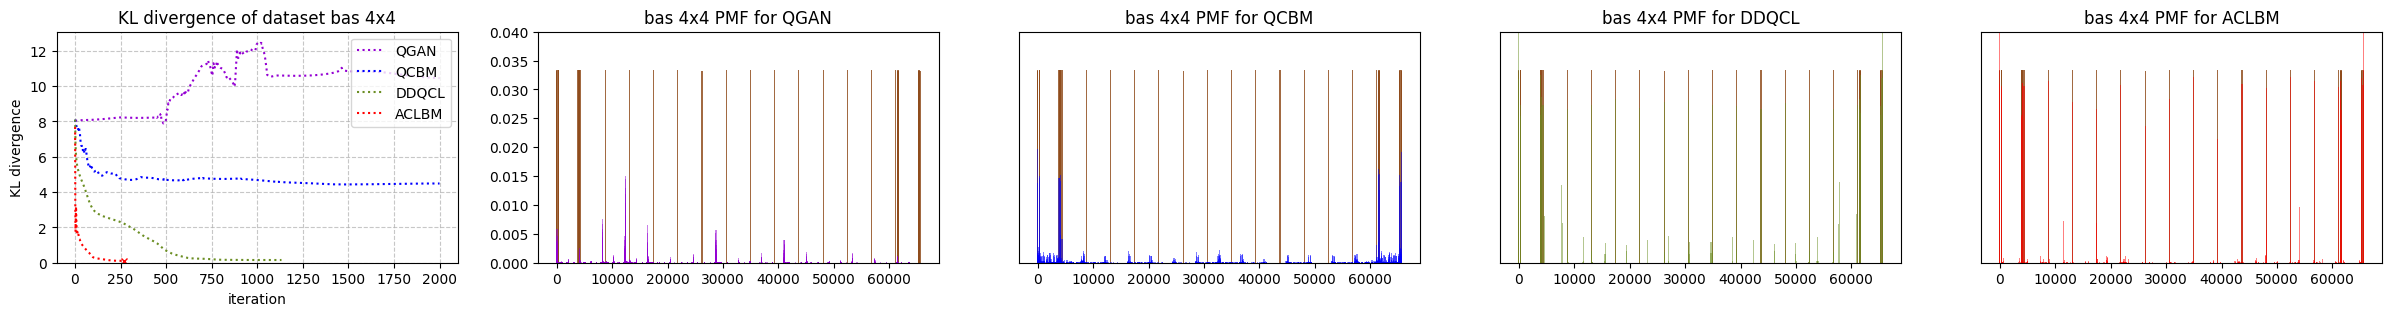

In [23]:
plotter_for_bas(
    qgan_file="./results/QGAN(data=bas 4x4, lr=0.001, reps=20)",
    qcbm_file="./results/QCBM(data=bas 4x4, lr=0.01, reps=20)",
    ddqcl_file="./results/DDQCL(data=bas 4x4, lr=0.01, reps=20)",
    aclbm_file="./results/ACLBM(data=bas 4x4, loss=KL divergence, Ng=300, t1=0.001, t2=0.005)",
    data="bas 4x4"
)

In [6]:
def plotter_for_real_image(qgan_file, qcbm_file, ddqcl_file, aclbm_file, data):
    with open(qgan_file + ".pkl", "rb") as qgan_loss, open(qgan_file + ".pt", "rb") as qgan_hist, \
        open(qcbm_file + ".pkl", "rb") as qcbm_loss, open(qcbm_file + ".pt", "rb") as qcbm_hist, \
        open(ddqcl_file + ".pkl", "rb") as ddqcl_loss, open(ddqcl_file + ".pt", "rb") as ddqcl_hist, \
        open(aclbm_file + ".pkl", "rb") as aclbm_loss, open(aclbm_file + ".pt", "rb") as aclbm_hist:
        
        real_img = DATA_HUB[data].get_data(num=100000000).reshape(256, 256)

        qgan_loss_history, qgan_js_div, qgan_kl_div = pickle.load(qgan_loss)
        qcbm_loss_history, qcbm_js_div, qcbm_kl_div = pickle.load(qcbm_loss)
        ddqcl_loss_history, ddqcl_js_div, ddqcl_kl_div = pickle.load(ddqcl_loss)
        aclbm_loss_history, aclbm_js_div, aclbm_kl_div = pickle.load(aclbm_loss)

        qgan_img = torch.load(qgan_hist).view(256, 256).numpy()
        qcbm_img = torch.load(qcbm_hist).view(256, 256).numpy()
        ddqcl_img = torch.load(ddqcl_hist).view(256, 256).numpy()
        aclbm_img = torch.load(aclbm_hist).view(256, 256).numpy()

    aclbm_kl_indices = find_indices(aclbm_kl_div["iteration"], aclbm_kl_div["epoch"])

    fig = plt.figure(figsize=(30, 3))
    gs = gridspec.GridSpec(1, 6, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    ax4 = fig.add_subplot(gs[0, 3])
    ax5 = fig.add_subplot(gs[0, 4])
    ax6 = fig.add_subplot(gs[0, 5])
    ax1.plot(np.arange(len(qgan_kl_div)) + 1,                qgan_kl_div,               ls=":", color="darkviolet", label="QGAN", markerfacecolor="none",)
    ax1.plot(np.arange(len(qcbm_kl_div)) + 1,                qcbm_kl_div,               ls=":", color="blue",       label="QCBM", markerfacecolor="none")
    ax1.plot(np.arange(len(ddqcl_kl_div)) + 1,               ddqcl_kl_div,              ls=":", color="olivedrab",  label="DDQCL")
    ax1.plot(np.arange(len(aclbm_kl_div["iteration"])) + 1,  aclbm_kl_div["iteration"], ls=":", color="red",        label="ACLBM")
    ax1.plot(aclbm_kl_indices + 1,                           aclbm_kl_div["epoch"],     ls="",  color="red",        marker="x",   markersize=5)
    ax1.set_ylim(bottom=0.0, top=2.0)
    ax1.set_title(f"KL divergence of dataset {data}")
    ax1.set_xlabel("iteration")
    ax1.set_ylabel("KL divergence")
    ax1.grid(ls="--", alpha=0.7)
    ax1.legend()

    ax2.imshow(qgan_img)
    ax2.set_title(f"{data} for QGAN")

    ax3.imshow(qcbm_img)
    ax3.set_title(f"{data} for QCBM")

    ax4.imshow(ddqcl_img)
    ax4.set_title(f"{data} for DDQCL")

    ax5.imshow(aclbm_img)
    ax5.set_title(f"{data} for ACLBM")

    ax6.imshow(real_img)
    ax6.set_title(f"{data}")

    plt.show()

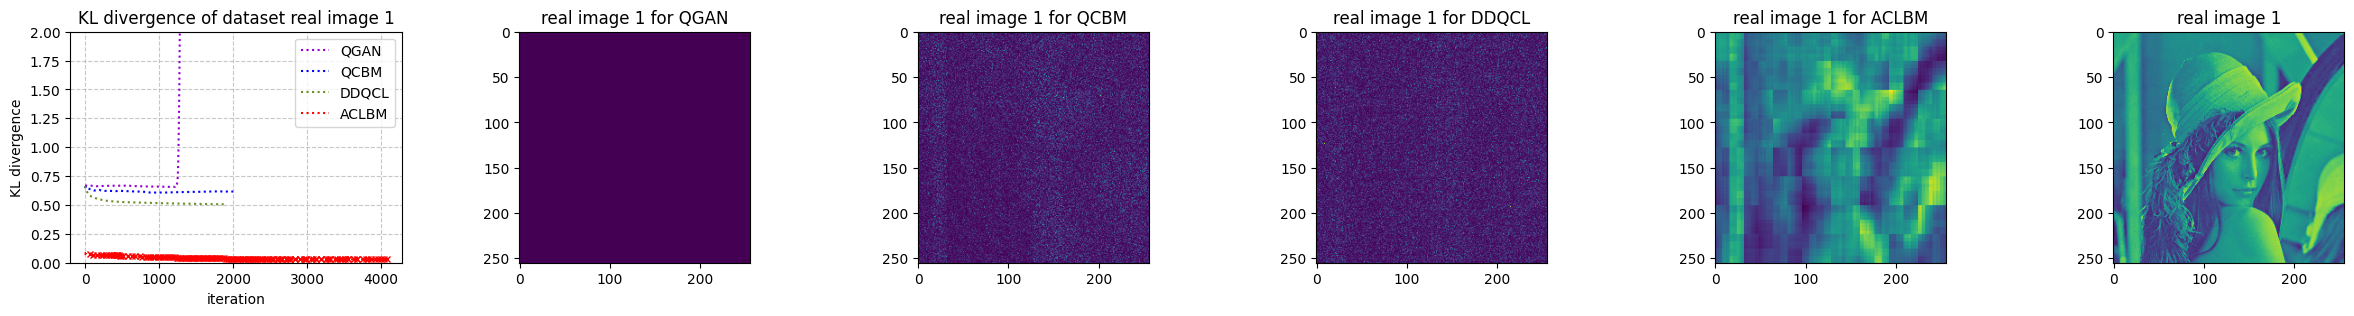

In [7]:
plotter_for_real_image(
    qgan_file="./results/QGAN(data=real image 1, lr=0.001, reps=20)",
    qcbm_file="./results/QCBM(data=real image 1, lr=0.01, reps=20)",
    ddqcl_file="./results/DDQCL(data=real image 1, lr=0.001, reps=20)",
    aclbm_file="./results/ACLBM(data=real image 1, loss=KL divergence, Ng=3, t1=0.001, t2=0.005)",
    data="real image 1"
)

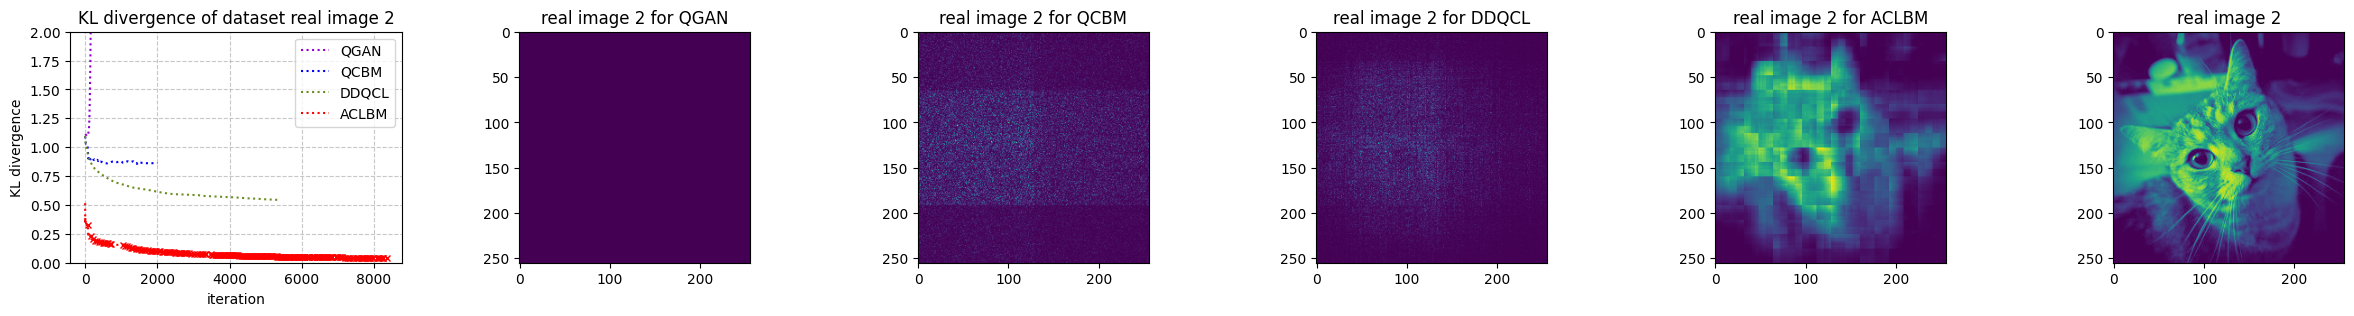

In [8]:
plotter_for_real_image(
    qgan_file="./results/QGAN(data=real image 2, lr=0.001, reps=20)",
    qcbm_file="./results/QCBM(data=real image 2, lr=0.01, reps=20)",
    ddqcl_file="./results/DDQCL(data=real image 2, lr=0.001, reps=20)",
    aclbm_file="./results/ACLBM(data=real image 2, loss=KL divergence, Ng=3, t1=0.001, t2=0.005)",
    data="real image 2"
)

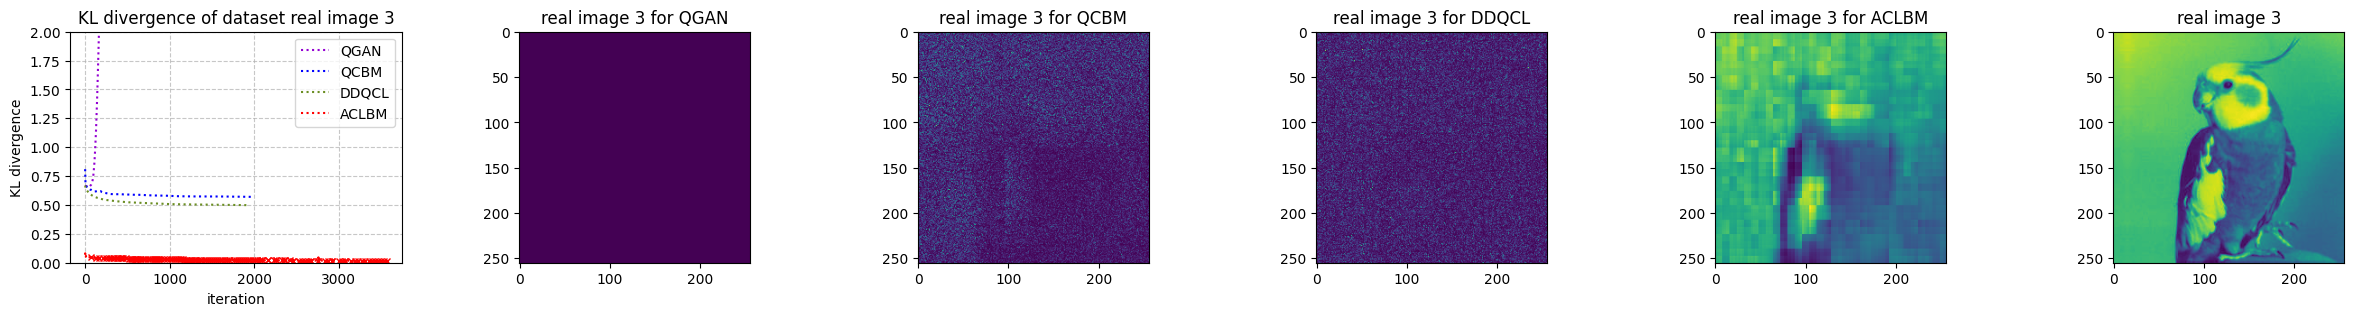

In [9]:
plotter_for_real_image(
    qgan_file="./results/QGAN(data=real image 3, lr=0.001, reps=20)",
    qcbm_file="./results/QCBM(data=real image 3, lr=0.01, reps=20)",
    ddqcl_file="./results/DDQCL(data=real image 3, lr=0.001, reps=20)",
    aclbm_file="./results/ACLBM(data=real image 3, loss=KL divergence, Ng=3, t1=0.001, t2=0.005)",
    data="real image 3"
)